# Reproducibility Project

In [1]:
suppressMessages(library(tidyverse))
library(readxl)
options(warn=-1)

## Based on Figure 4 panels A-C from "Evolution of correlated complexity in the radically different courtship signals of birds-of-paradise", Ligon et al., 2018
<a href="https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.2006962#pbio.2006962.s003">Publication</a>
<a href="https://doi.org/10.1371/journal.pbio.2006962.s003">Data</a>

### Grab the data and manipulate it as needed

In [2]:
birdData <- read_excel('paradise_display_data.xls') %>%
    select(species, color.richness, behavioral.richness, acoustic.richness, displayheight) %>%
    gather(color.richness, behavioral.richness, acoustic.richness, key='type', value = 'measurement') %>%
    mutate_at(vars(measurement), log)
print(birdData, n=5)

# A tibble: 120 x 4
  species                 displayheight type           measurement
  <chr>                   <chr>         <chr>                <dbl>
1 Lycocorax_pyrrhopterus  understory    color.richness        3.69
2 Phonygammus_keraudrenii understory    color.richness        4.24
3 Manucodia_jobiensis     understory    color.richness        4.31
4 Manucodia_ater          understory    color.richness        4.36
5 Manucodia_comrii        understory    color.richness        4.30
# ... with 115 more rows


### Plot in the correct order

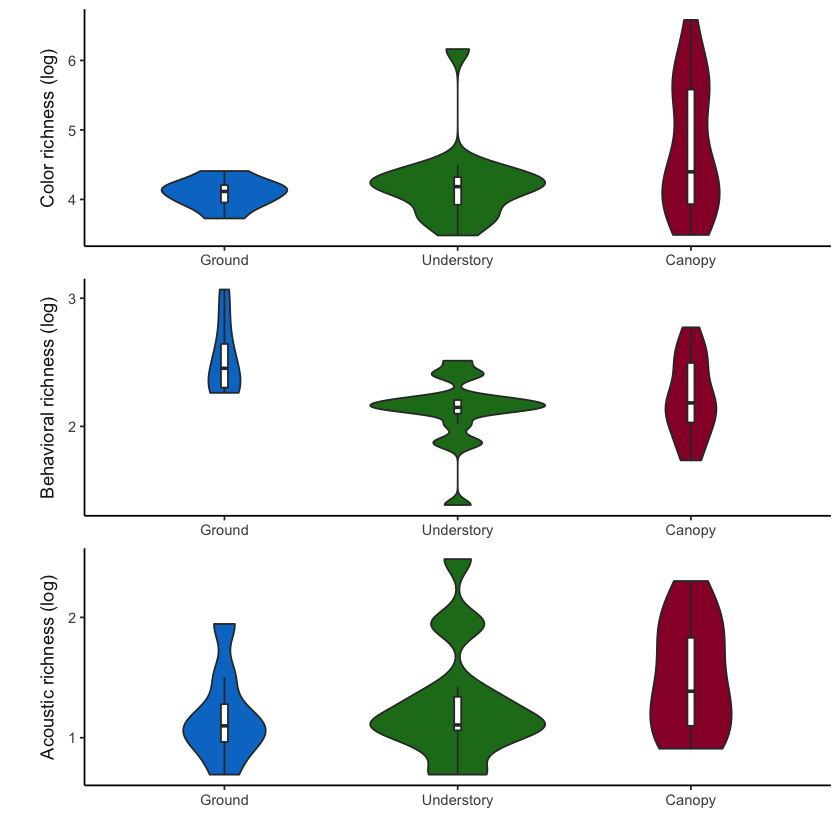

In [3]:
display_order <- c('ground', 'understory', 'canopy')
type_order = c('color.richness', 'behavioral.richness', 'acoustic.richness')
mypalette = c('#990033', '#007acc', '#1f7a1f')

ggplot(birdData, aes(x=factor(displayheight, level=display_order), y=measurement, width=0.75, height=2)) +
    geom_violin(aes(fill=displayheight)) +
    geom_boxplot(width=0.03, outlier.shape=NA) +
    facet_wrap(~factor(type, level=type_order), strip.position='left', 
                labeller=as_labeller(c(color.richness='Color richness (log)', 
                                       behavioral.richness='Behavioral richness (log)',
                                       acoustic.richness='Acoustic richness (log)')),
                dir='v', scales='free') +
    scale_y_continuous(breaks=c(1, 2, 3, 4, 5, 6, 7)) +
    scale_x_discrete(labels=c('Ground', 'Understory', 'Canopy')) +
    xlab('') +
    ylab('') +
    theme_classic() +
    theme(strip.background=element_blank(), strip.placement='outside', 
          strip.text=element_text(size=11), legend.position='none') +
    scale_fill_manual(values=mypalette)

## (Original Figure)

## Based on Figure 2 from "Evolution of antipredator behavior in an island lizard species, Podarcis erhardii (Reptilia: Lacertidae): The sum of all fears?", Brock et al., 2014
<a href="https://onlinelibrary.wiley.com/doi/full/10.1111/evo.12555">Publication</a>
<a href="https://datadryad.org/resource/doi:10.5061/dryad.bt52f?show=full">Datasets</a>

### Load the data and create a tibble with only the information we need

In [4]:
myData <- read_excel('Hierarchical Linear Model.xlsx') %>%
    select('Island name', 'Group FID mean', 'Total Number of Predators') %>%
    distinct()
print(myData, n=5)

# A tibble: 40 x 3
  `Island name` `Group FID mean` `Total Number of Predators`
  <chr>                    <dbl>                       <dbl>
1 Naxos                     193.                           6
2 Naxos                     276.                           6
3 Mando                     268.                           3
4 Glaronissi                194.                           1
5 Naxos                     361.                           6
# ... with 35 more rows


## Plot the data

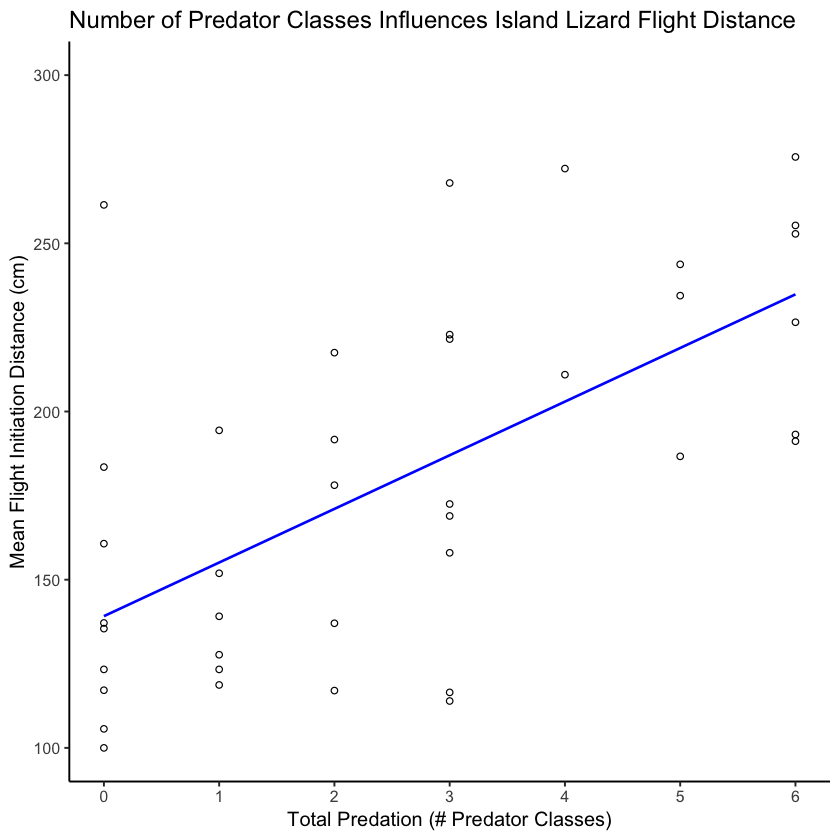

In [5]:
ggplot(myData, aes(x = `Total Number of Predators`, y = `Group FID mean`)) +
    geom_point(shape=1) +
    geom_smooth(method=lm, se=FALSE, color='blue', size=0.75) +
    scale_x_continuous(breaks = round(seq(min(myData$`Total Number of Predators`), max(myData$`Total Number of Predators`), by = 1),1)) +
    ylim(100, 300) +
    xlab("Total Predation (# Predator Classes)") +
    ylab("Mean Flight Initiation Distance (cm)") +
    ggtitle("Number of Predator Classes Influences Island Lizard Flight Distance") +
    theme_classic(base_size=12) 

<b>Figure 2</b> Scatterplot of mean flight initiation distance by total number of predator types per island. Each datapoint represents one island. Mean FID increases as predation regime intensifies (R-squared = 0.4298, P < 0.001, N = 38).

## Code for generating statistics for figure description
<b>Note: I got a different r-squared value than the authors did</b>

In [6]:
fidPredation <- select(myData, `Group FID mean`, `Total Number of Predators`)
summary.lm(lm(fidPredation))


Call:
lm(formula = fidPredation)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.094 -31.591  -1.617  25.863 125.279 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  136.149     11.554  11.784 2.95e-14 ***
`Total Number of Predators`   18.295      3.418   5.352 4.40e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.04 on 38 degrees of freedom
Multiple R-squared:  0.4298,	Adjusted R-squared:  0.4148 
F-statistic: 28.64 on 1 and 38 DF,  p-value: 4.401e-06
